## Question 3a
For each year: Can we identify trends or patterns in specific neighbourhoods (e.g. certain neighbourhoods seeing an increase or decrease in crime)?

In [3]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [4]:
# Read in CSV as a DataFrame and inspect
mci_all = pd.read_csv('resources/mci_no_duplicates_2018_20_22.csv')
mci_all.head()

,_id,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,LOCATION_TYPE,PREMISES_TYPE,UCR_CODE,UCR_EXT,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140
0,134022,GO-20181532,2018-01-01,2018-01-01,2018,January,1,1,Monday,4.0,...,Other Commercial / Corporate Places (For Profi...,Commercial,1430,100,Assault,Assault,168,Downtown Yonge East,75,Church-Yonge Corridor (75)
1,134023,GO-20184352,2018-01-01,2018-01-01,2018,January,1,1,Monday,18.0,...,"Apartment (Rooming House, Condo)",Apartment,1430,100,Assault,Assault,150,Fenside-Parkwoods,45,Parkwoods-Donalda (45)
2,134024,GO-20184878,2018-01-01,2018-01-01,2018,January,1,1,Monday,21.0,...,"Apartment (Rooming House, Condo)",Apartment,1420,100,Assault With Weapon,Assault,106,Humewood-Cedarvale,106,Humewood-Cedarvale (106)
3,134025,GO-20183609,2018-01-01,2018-01-01,2018,January,1,1,Monday,15.0,...,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,2130,210,Theft Over,Theft Over,95,Annex,95,Annex (95)
4,134026,GO-20184674,2018-01-01,2018-01-01,2018,January,1,1,Monday,20.0,...,Convenience Stores,Commercial,1610,210,Robbery - Business,Robbery,123,Cliffcrest,123,Cliffcrest (123)


In [5]:
#Drop unncessary rows
mci_columns = mci_all[['EVENT_UNIQUE_ID', 'REPORT_DATE', 'OCC_DATE', 'OCC_MONTH', 'OCC_YEAR', 'LOCATION_TYPE', 'PREMISES_TYPE', 'OFFENCE', 'MCI_CATEGORY', 'HOOD_158', 'NEIGHBOURHOOD_158']]
mci_columns.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20181532,2018-01-01,2018-01-01,January,2018.0,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,168,Downtown Yonge East
1,GO-20184352,2018-01-01,2018-01-01,January,2018.0,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,150,Fenside-Parkwoods
2,GO-20184878,2018-01-01,2018-01-01,January,2018.0,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,106,Humewood-Cedarvale
3,GO-20183609,2018-01-01,2018-01-01,January,2018.0,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,95,Annex
4,GO-20184674,2018-01-01,2018-01-01,January,2018.0,Convenience Stores,Commercial,Robbery - Business,Robbery,123,Cliffcrest


In [6]:
#Check dataframe dtypes
mci_columns.dtypes

EVENT_UNIQUE_ID       object
REPORT_DATE           object
OCC_DATE              object
OCC_MONTH             object
OCC_YEAR             float64
LOCATION_TYPE         object
PREMISES_TYPE         object
OFFENCE               object
MCI_CATEGORY          object
HOOD_158              object
NEIGHBOURHOOD_158     object
dtype: object

In [7]:
#Convert OCC_YEAR column from dtype float64 to int64 then check dtypes again
mci_columns['OCC_YEAR'] = mci_columns['OCC_YEAR'].astype('int64')
mci_columns.dtypes

/var/folders/m2/ysnn55010957_py0m5n5dds40000gn/T/ipykernel_46290/3081604221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mci_columns['OCC_YEAR'] = mci_columns['OCC_YEAR'].astype('int64')


EVENT_UNIQUE_ID      object
REPORT_DATE          object
OCC_DATE             object
OCC_MONTH            object
OCC_YEAR              int64
LOCATION_TYPE        object
PREMISES_TYPE        object
OFFENCE              object
MCI_CATEGORY         object
HOOD_158             object
NEIGHBOURHOOD_158    object
dtype: object

In [8]:
#Check for any null values
mci_columns.count()

EVENT_UNIQUE_ID      104454
REPORT_DATE          104454
OCC_DATE             104454
OCC_MONTH            104454
OCC_YEAR             104454
LOCATION_TYPE        104454
PREMISES_TYPE        104454
OFFENCE              104454
MCI_CATEGORY         104454
HOOD_158             104454
NEIGHBOURHOOD_158    104454
dtype: int64

In [9]:
#Separate dataframe into individual dataframes for each year (2018, 2020 and 2022)
mci_2018 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2018]
mci_2020 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2020]
mci_2022 = mci_columns.loc[mci_columns['OCC_YEAR'] == 2022]

## 2018

In [10]:
#Inspect dataframe for 2018
mci_2018.head()

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
0,GO-20181532,2018-01-01,2018-01-01,January,2018,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,168,Downtown Yonge East
1,GO-20184352,2018-01-01,2018-01-01,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,150,Fenside-Parkwoods
2,GO-20184878,2018-01-01,2018-01-01,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault With Weapon,Assault,106,Humewood-Cedarvale
3,GO-20183609,2018-01-01,2018-01-01,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Over,Theft Over,95,Annex
4,GO-20184674,2018-01-01,2018-01-01,January,2018,Convenience Stores,Commercial,Robbery - Business,Robbery,123,Cliffcrest


In [11]:
#Check the sum of offences reported in each neighbourhood
hood_offence_total = mci_2018.groupby('NEIGHBOURHOOD_158')['EVENT_UNIQUE_ID'].count()
hood_offence_total 

NEIGHBOURHOOD_158
Agincourt North                 226
Agincourt South-Malvern West    271
Alderwood                        81
Annex                           520
Avondale                        105
                               ... 
Yonge-Doris                     129
Yonge-Eglinton                  115
Yonge-St.Clair                   64
York University Heights         640
Yorkdale-Glen Park              324
Name: EVENT_UNIQUE_ID, Length: 159, dtype: int64

In [12]:
#Sort by highest to lowest
hood_sorted = hood_offence_total.sort_values(ascending = False)
hood_sorted

NEIGHBOURHOOD_158
West Humber-Clairville    1041
Moss Park                  912
Downtown Yonge East        778
Kensington-Chinatown       750
Yonge-Bay Corridor         741
                          ... 
Guildwood                   64
Yonge-St.Clair              64
Woodbine-Lumsden            63
Lambton Baby Point          54
Maple Leaf                  53
Name: EVENT_UNIQUE_ID, Length: 159, dtype: int64

In [13]:
#Get top 5 and bottom 5 neighbourhoods by sum of offences
top_5_hoods = hood_sorted.head()
bottom_5_hoods = hood_sorted.tail()
top_5_hoods

NEIGHBOURHOOD_158
West Humber-Clairville    1041
Moss Park                  912
Downtown Yonge East        778
Kensington-Chinatown       750
Yonge-Bay Corridor         741
Name: EVENT_UNIQUE_ID, dtype: int64

In [14]:
#From the bottom 5 neighbourhood series, extract a list of each neighbourhood name using a for loop
bottom_5_names = bottom_5_hoods.index
bottom_neighbourhoods = []
for index in range(0, len(bottom_5_names)):
   bottom_neighbourhoods.append(bottom_5_names[index])
bottom_neighbourhoods

['Guildwood',
 'Yonge-St.Clair',
 'Woodbine-Lumsden',
 'Lambton Baby Point',
 'Maple Leaf']

## Top 5 neighbourhoods with the highest number of offences

In [15]:
#From the top 5 neighbourhood series, extract a list of each neighbourhood name using a for loop
top_5_names = top_5_hoods.index
top_neighbourhoods = []
for index in range(0, len(top_5_names)):
   top_neighbourhoods.append(top_5_names[index])
top_neighbourhoods

['West Humber-Clairville',
 'Moss Park',
 'Downtown Yonge East',
 'Kensington-Chinatown',
 'Yonge-Bay Corridor']

In [16]:
#Will separate each of the top 5 neighbourhoods in their own dataframes to further analyze them
#Neighbourhood 1: West Humber-Clairville
whc_hood = mci_2018.loc[mci_2018['NEIGHBOURHOOD_158'] == 'West Humber-Clairville']
whc_hood

,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,OCC_MONTH,OCC_YEAR,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158
66,GO-20182608,2018-01-01,2018-01-01,January,2018,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Over,Theft Over,1,West Humber-Clairville
98,GO-20189906,2018-01-02,2018-01-02,January,2018,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Mugging,Robbery,1,West Humber-Clairville
182,GO-201817980,2018-01-03,2018-01-03,January,2018,Other Commercial / Corporate Places (For Profi...,Commercial,Assault,Assault,1,West Humber-Clairville
221,GO-201813380,2018-01-03,2018-01-02,January,2018,"Parking Lots (Apt., Commercial Or Non-Commercial)",Outside,Theft Of Motor Vehicle,Auto Theft,1,West Humber-Clairville
249,GO-201821144,2018-01-04,2018-01-04,January,2018,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,1,West Humber-Clairville
...,...,...,...,...,...,...,...,...,...,...,...
34612,GO-20201985462,2020-10-14,2018-10-04,October,2018,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,1,West Humber-Clairville
34666,GO-2021597598,2021-04-01,2018-01-01,January,2018,"Construction Site (Warehouse, Trailer, Shed)",Commercial,Theft Over,Theft Over,1,West Humber-Clairville
34705,GO-20211976842,2021-10-14,2018-01-01,January,2018,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault With Weapon,Assault,1,West Humber-Clairville
34706,GO-20211976842,2021-10-14,2018-01-01,January,2018,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,1,West Humber-Clairville


In [17]:
#Group the whc_hood dataframe by MCI_CATEGORY and get the count of offences per each category
whc_mci_category = whc_hood.groupby('MCI_CATEGORY')['EVENT_UNIQUE_ID'].count()
whc_mci_category

MCI_CATEGORY
Assault            300
Auto Theft         436
Break and Enter    170
Robbery             81
Theft Over          54
Name: EVENT_UNIQUE_ID, dtype: int64

Text(0.5, 1.0, 'Major Crime Indicators for West Humber-Clairville')

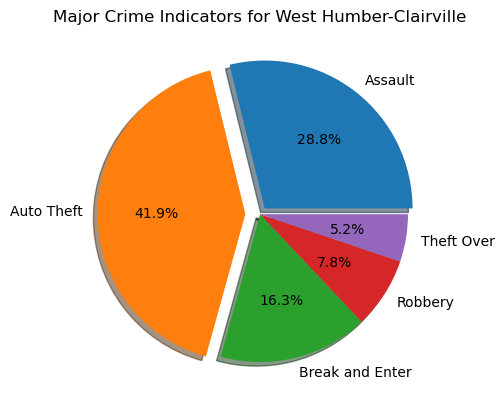

In [18]:
#Create pie chart of MCI_CATEGORY for West Humber-Clairville
explode = (0.05,0.1,0,0,0)
whc_mci_category.plot(kind = 'pie', autopct = '%1.1f%%', explode = explode, shadow = True)
plt.ylabel('')
plt.title('Major Crime Indicators for West Humber-Clairville')

In [39]:
#Add header: Auto theft and assault
#Create scatter plot between assault and auto theft in dataframe whc_hood
#Separate the rows for MCI_CATEGORY assault and auto theft into their own dataframes 
whc_auto_theft = whc_hood.loc[whc_hood['MCI_CATEGORY'] == 'Auto Theft']
whc_assault = whc_hood.loc[whc_hood['MCI_CATEGORY'] == 'Assault']

#Reduce columns to only those needed ('OCC_DATE' and 'MCI_CATEGORY')
whc_auto_theft = whc_auto_theft[['OCC_DATE', 'MCI_CATEGORY']]
whc_assault = whc_assault[['OCC_DATE', 'MCI_CATEGORY']]

#Check the length of the new dataframes as they need to be the same length in order to compare them in a scatter plot
whc_auto_theft_len = len(whc_auto_theft)
whc_assault_len = len(whc_assault)
len_difference = whc_auto_theft_len - whc_assault_len

#Need to figure out how to select a sample of whc_auto_theft (check module 4 or 5 activities? pretty sure we went over this)
#so that it's the same length as whc_assault (300)

#Set x and y values


#Need to figure out how to overlay the two scatter plots on the same figure